### Differential Equation

$\frac{\mathrm{d}\Psi}{\mathrm{d}x} = 4x,$

$\Psi(0) = 0, x \in [-4, 4]$

In [1]:
from typing import List, Callable
import autograd.numpy as np

from neural_network import init_weights, forward
from optimizers import gradient_descent, adam
from activation_functions import elu, sigmoid, tanh, arctan
from plotting_tools import plot_ode, plot_system_ode

In [2]:
PSI_0 = np.array([0])


def derivative(x, psi) -> np.ndarray:
    """Example #1 derivative.

    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_dot = 4 * x
    return psi_dot


def analytical_solution(x):
    """Analytical solution to example #1.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    return 2 * x**2


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([PSI_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

Iteration:  0
 6.392665230606882
Iteration:  1
 6.385144271118274
Iteration:  2
 6.377624710414513
Iteration:  3
 6.370106572601037
Iteration:  4
 6.3625898800347915
Iteration:  5
 6.355074653315516
Iteration:  6
 6.3475609112793805
Iteration:  7
 6.340048670995304
Iteration:  8
 6.332537947764207
Iteration:  9
 6.3250287551214495
Iteration:  10
 6.317521104842676
Iteration:  11
 6.310015006953217
Iteration:  12
 6.302510469741152
Iteration:  13
 6.295007499774114
Iteration:  14
 6.287506101919814
Iteration:  15
 6.2800062793702445
Iteration:  16
 6.2725080336694585
Iteration:  17
 6.26501136474479
Iteration:  18
 6.257516270941305
Iteration:  19
 6.250022749059293
Iteration:  20
 6.242530794394514
Iteration:  21
 6.235040400780947
Iteration:  22
 6.227551560635736
Iteration:  23
 6.220064265006036
Iteration:  24
 6.21257850361743
Iteration:  25
 6.205094264923622
Iteration:  26
 6.197611536157081
Iteration:  27
 6.190130303380345
Iteration:  28
 6.182650551537679
Iteration:  29
 6.175

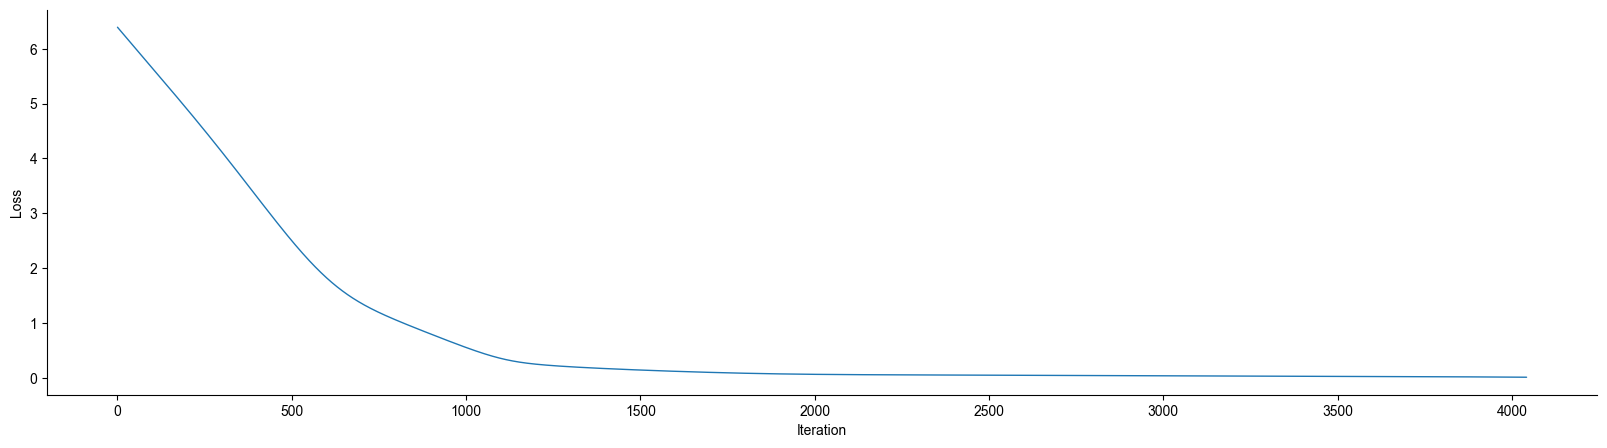

In [3]:
def train():
    t = np.arange(0, 2, 0.2)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights = init_weights(1, hidden_sizes, 1)
    adam(
        t,
        [nn_weights],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=50000,
        step_size=0.001,
    )

    return nn_weights, activation_fns


nn_weights, activation_fns = train()

### Evaluating Results

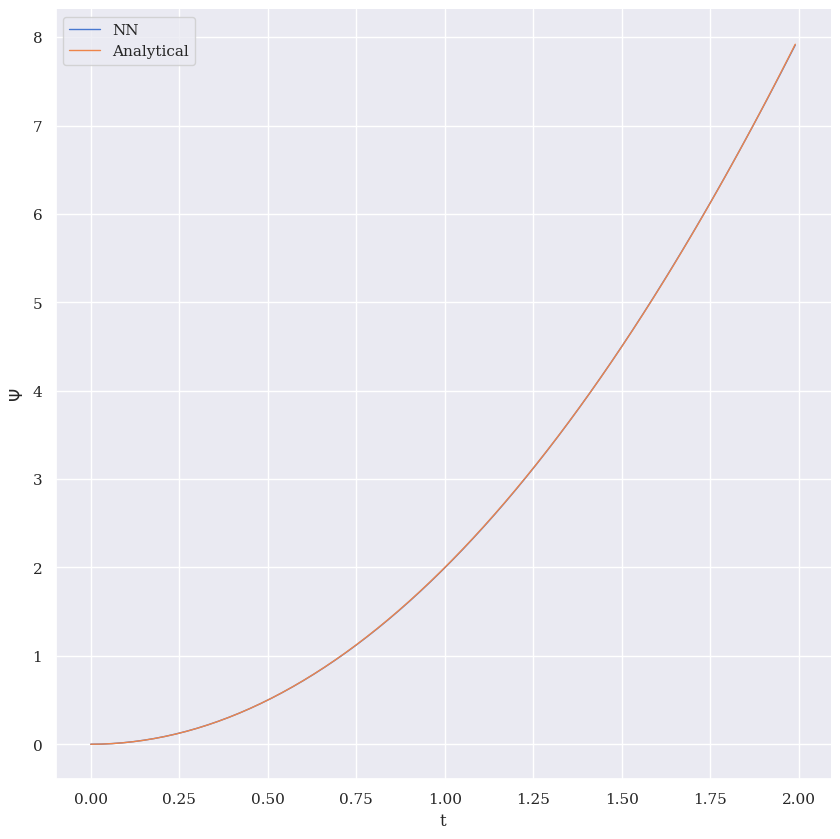

In [5]:
t = np.arange(0, 2, 0.01)
res = trial_solution(t, [nn_weights], activation_fns)
an_sol = analytical_solution(t)
plot_ode(t, res, an_sol)